In [1]:
from netCDF4 import Dataset

import numpy as np
import numpy.polynomial.polynomial as poly

import csv

import matplotlib.pyplot as plt
import mpl_toolkits.basemap as mtb
from mpl_toolkits.basemap import Basemap


In [2]:
def save(name='', fmt='png'):
    pwd = os.getcwd()
#    iPath = './pictures/{}'.format(fmt)
    iPath = '.'
    if not os.path.exists(iPath):
        os.mkdir(iPath)
    os.chdir(iPath)
    plt.savefig('{}.{}'.format(name, fmt), fmt='png')
    os.chdir(pwd)
    #plt.close()

In [15]:
data_path = 'C:\\Users\\23\\anaconda3\\project\\'
#filein = data_path + 'jra55.hgt.1000.oct-apr.7071.612.nc'
#filein = data_path + 'jra55.hgt.1000.oct-apr.7071.26.nc'
#filein = data_path + 'jra55.hgt.1000.oct-apr.7071.s2.nc'
filein = data_path + 'jra55.hgt.1000.oct-apr.7071.g12.nc'
# В этой части кода загружается файл с данными внезапного стратосферного потепления, которые и будут анализироваться в этой работе. 

In [16]:
ncin=Dataset(filein,'r')
bp_hgt_g12=ncin.variables['bp_hgt'][:]
lons=ncin.variables['lon'][:]
lats=ncin.variables['lat'][:]
time=ncin.variables['time'][:]
ncin.close()

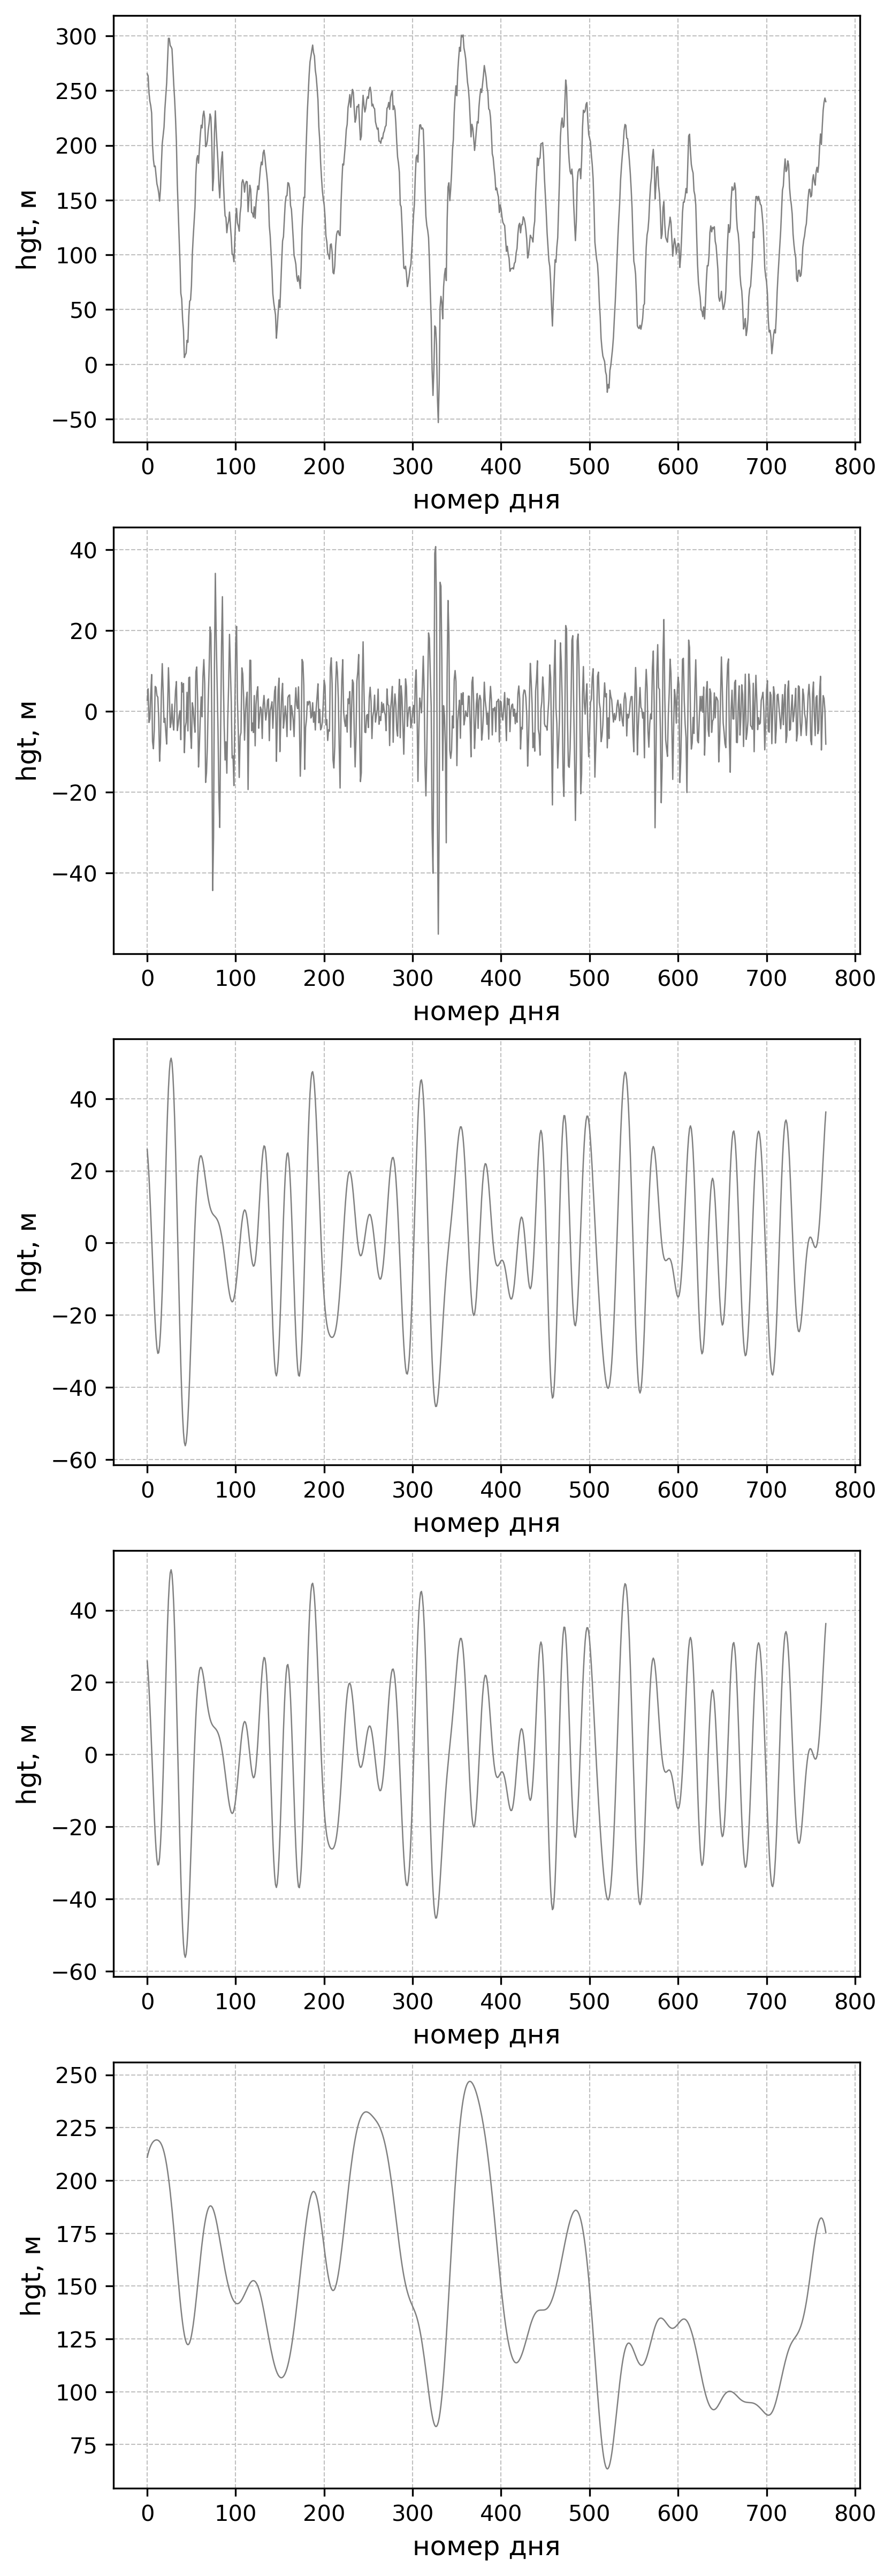

In [17]:
days = np.asarray([i for i in range(0,768,1)])

fig1 = plt.figure(figsize=(6, 20),dpi=300)

ax4=fig1.add_subplot(5,1,1,label='1')
ax4.plot(days,bp_hgt_s2[:,36,20]+bp_hgt_26[:,36,20]+bp_hgt_612[:,36,20]+bp_hgt_g12[:,36,20], linewidth=0.6,color='grey')
ax4.grid(True, color = 'silver',linestyle='dashed',linewidth=0.7)
#ax1.set_title(seas_tit + ' $\sigma(hgt_{2-6 days})$ for period 1958/59-2017/18 at (355E,60N)')

ax4.set_ylabel('hgt, м',size='large')
ax4.set_xlabel('номер дня',size='large')
ax4.grid(linewidth='0.5', color='silver',linestyle='dashed')



ax0=fig1.add_subplot(5,1,2,label='1')
ax0.plot(days,bp_hgt_s2[:,36,20],linewidth=0.6,color='grey')
ax0.grid(True, color = 'silver',linestyle='dashed',linewidth=0.7)
#ax1.set_title(seas_tit + ' $\sigma(hgt_{2-6 days})$ for period 1958/59-2017/18 at (355E,60N)')

ax0.set_ylabel('hgt, м',size='large')
ax0.set_xlabel('номер дня',size='large')
ax0.grid(linewidth='0.5', color='silver',linestyle='dashed')

#plt.savefig('filter_example_26.png')

ax1=fig1.add_subplot(5,1,3,label='1')
ax1.plot(days,bp_hgt_26[:,36,20],linewidth=0.6,color='grey')
ax1.grid(True, color = 'silver',linestyle='dashed',linewidth=0.7)
#ax1.set_title(seas_tit + ' $\sigma(hgt_{2-6 days})$ for period 1958/59-2017/18 at (355E,60N)')

ax1.set_ylabel('hgt, м',size='large')
ax1.set_xlabel('номер дня',size='large')
ax1.grid(linewidth='0.5', color='silver',linestyle='dashed')

ax2=fig1.add_subplot(5,1,4,label='1')
ax2.plot(days,bp_hgt_612[:,36,20],linewidth=0.6,color='grey')
ax2.grid(True, color = 'silver',linestyle='dashed',linewidth=0.7)
#ax1.set_title(seas_tit + ' $\sigma(hgt_{2-6 days})$ for period 1958/59-2017/18 at (355E,60N)')

ax2.set_ylabel('hgt, м',size='large')
ax2.set_xlabel('номер дня',size='large')
ax2.grid(linewidth='0.5', color='silver',linestyle='dashed')

ax3=fig1.add_subplot(5,1,5,label='1')
ax3.plot(days,bp_hgt_g12[:,36,20],linewidth=0.6,color='grey')
ax3.grid(True, color = 'silver',linestyle='dashed',linewidth=0.7)
#ax1.set_title(seas_tit + ' $\sigma(hgt_{2-6 days})$ for period 1958/59-2017/18 at (355E,60N)')

ax3.set_ylabel('hgt, м',size='large')
ax3.set_xlabel('номер дня',size='large')
ax3.grid(linewidth='0.5', color='silver',linestyle='dashed')

In [18]:
bp_hgt_ssw_b=np.std(bp_hgt_26[392-120:392,:,:],axis=0)

In [19]:
bp_hgt_ssw_a=np.std(bp_hgt_26[392:392+120,:,:],axis=0)

In [20]:
bp_hgt_std=np.std(bp_hgt_26[:,:,:],axis=0)

In [21]:
bp_hgt_std.shape

(73, 288)

Text(0.5, 1.0, 'STD mean (%, 2-6 days band-pass)')

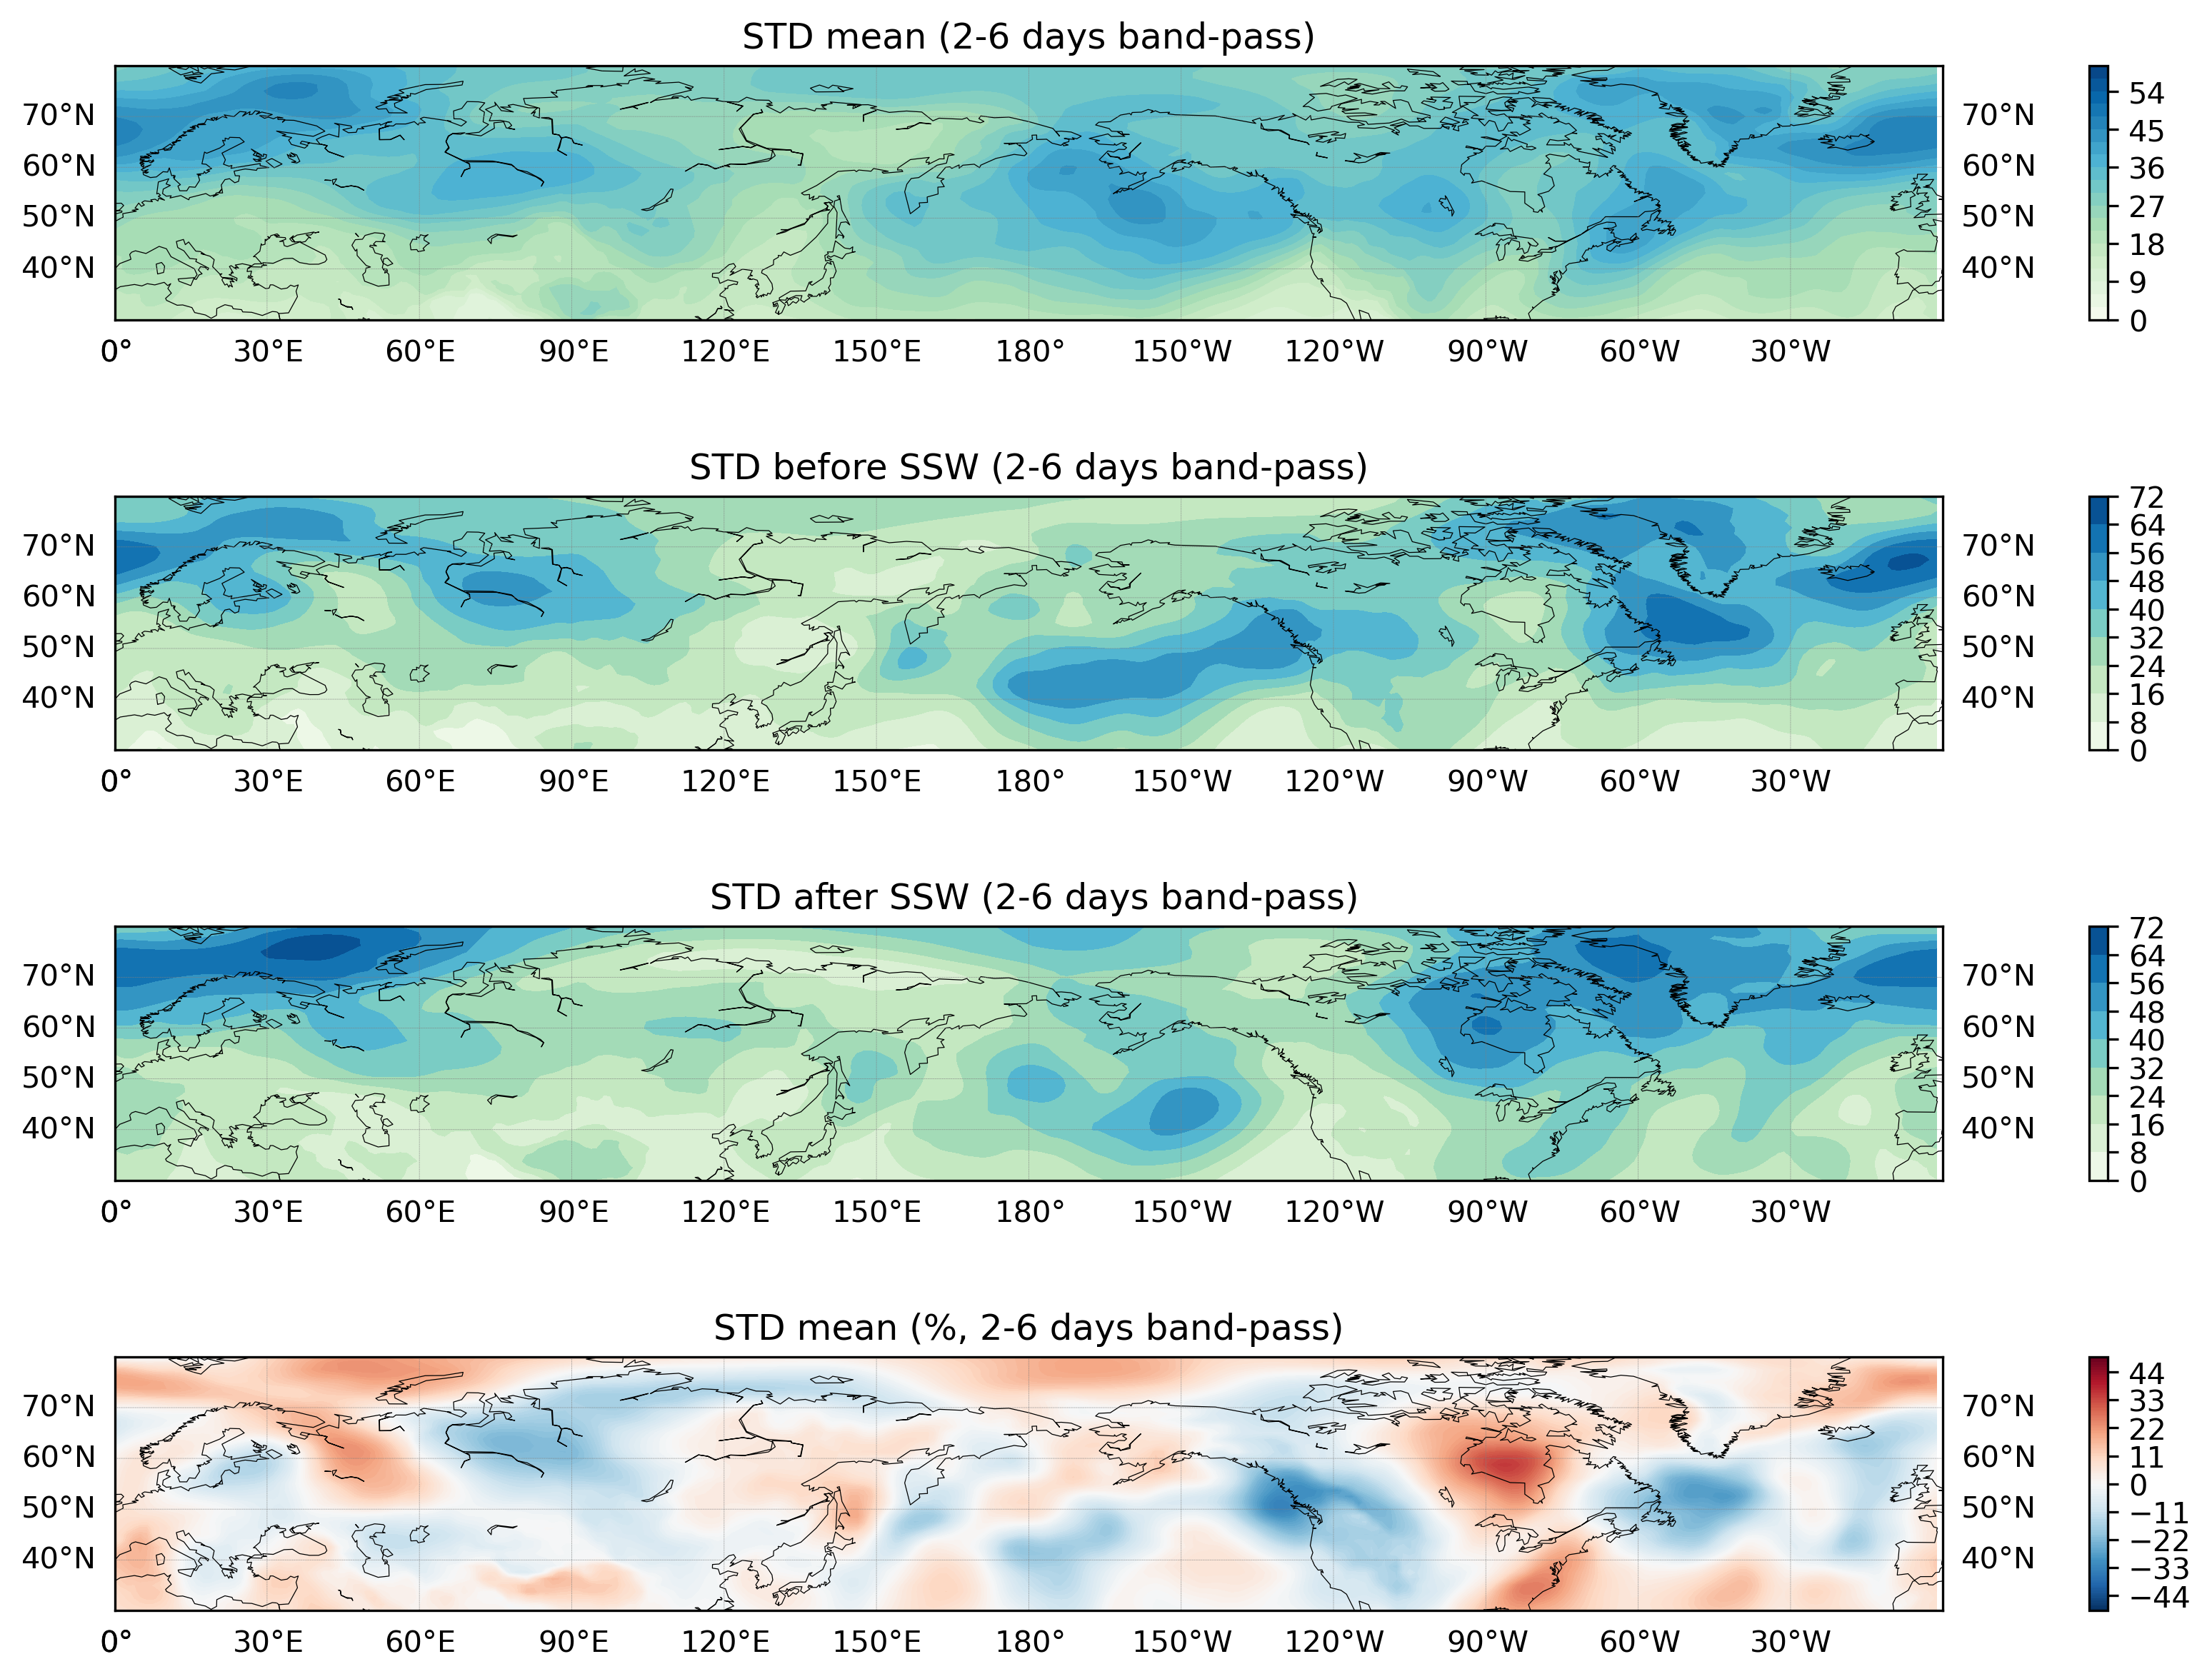

In [24]:
meridians=np.arange(-180,180,30)
meridians_lbls=[0,0,0,1]
parallels=np.arange(40,80,10)
parallels_lbls=[1,1,0,0]

fig = plt.figure(figsize=(12,10),dpi=300)


ax1=fig.add_subplot(411,label="1")
#m=Basemap(projection='nplaea',lon_0=180,boundinglat=30,llcrnrlat = 30,urcrnrlat=80, llcrnrlon = 30,urcrnrlon=300,resolution='c')
m1=Basemap(projection='cyl',ax=ax1, llcrnrlat = 30,urcrnrlat=80, llcrnrlon = 0,urcrnrlon=360,resolution='c')

x, y = m1(*np.meshgrid(lons, lats))
#x, y = m1(*np.meshgrid(lons, lats))
clevs = np.linspace(0,60,21)
cs1=m1.contourf(x, y, bp_hgt_std[:,:], clevs, cmap=plt.cm.GnBu)
m1.colorbar(cs1,location='right',size='1%',pad='8%')
#m.colorbar(cs,location='right',size='2%',pad='8%',ticks=[-5,-3,0,3,5])
m1.drawcoastlines(color="k",linewidth=0.3)
#m.drawcountries()DJF
#m.drawrivers()
#m.bluemarble()

m1.drawmeridians(meridians,color="grey",linewidth=0.2,labels=meridians_lbls)
m1.drawparallels(parallels,color="grey",linewidth=0.2,labels=parallels_lbls)
#ax1.set_xlabel('Longitude',labelpad=20,fontstretch= 'condensed')
#ax1.set_ylabel('Latitude',labelpad=40,fontstretch= 'condensed')
#ax1.set_xticks(meridians)
ax1.set_title('STD mean (2-6 days band-pass)',fontstretch= 'condensed')

#plt.savefig(OutPath+'diff_SSWa-SSWb_norm_storm_track_jra55_'+ff+'_1000.png', fmt='png');

ax2=fig.add_subplot(412,label="1")
#m=Basemap(projection='nplaea',lon_0=180,boundinglat=30,llcrnrlat = 30,urcrnrlat=80, llcrnrlon = 30,urcrnrlon=300,resolution='c')
m2=Basemap(projection='cyl',ax=ax2, llcrnrlat = 30,urcrnrlat=80, llcrnrlon = 0,urcrnrlon=360,resolution='c')

x, y = m2(*np.meshgrid(lons, lats))
#x, y = m1(*np.meshgrid(lons, lats))
clevs = np.linspace(0,60,21)
cs2=m2.contourf(x, y, bp_hgt_ssw_b[:,:], cmap=plt.cm.GnBu)
m2.colorbar(cs2,location='right',size='1%',pad='8%')
#m.colorbar(cs,location='right',size='2%',pad='8%',ticks=[-5,-3,0,3,5])
m2.drawcoastlines(color="k",linewidth=0.3)
#m.drawcountries()DJF
#m.drawrivers()
#m.bluemarble()

m2.drawmeridians(meridians,color="grey",linewidth=0.2,labels=meridians_lbls)
m2.drawparallels(parallels,color="grey",linewidth=0.2,labels=parallels_lbls)
#ax1.set_xlabel('Longitude',labelpad=20,fontstretch= 'condensed')
#ax1.set_ylabel('Latitude',labelpad=40,fontstretch= 'condensed')
#ax1.set_xticks(meridians)
ax2.set_title('STD before SSW (2-6 days band-pass)',fontstretch= 'condensed')

ax3=fig.add_subplot(413,label="1")
#m=Basemap(projection='nplaea',lon_0=180,boundinglat=30,llcrnrlat = 30,urcrnrlat=80, llcrnrlon = 30,urcrnrlon=300,resolution='c')
m3=Basemap(projection='cyl',ax=ax3, llcrnrlat = 30,urcrnrlat=80, llcrnrlon = 0,urcrnrlon=360,resolution='c')

x, y = m3(*np.meshgrid(lons, lats))
#x, y = m1(*np.meshgrid(lons, lats))
clevs = np.linspace(0,60,21)
cs3=m3.contourf(x, y, bp_hgt_ssw_a[:,:], cmap=plt.cm.GnBu)
m3.colorbar(cs3,location='right',size='1%',pad='8%')
#m.colorbar(cs,location='right',size='2%',pad='8%',ticks=[-5,-3,0,3,5])
m3.drawcoastlines(color="k",linewidth=0.3)
#m.drawcountries()DJF
#m.drawrivers()
#m.bluemarble()

m3.drawmeridians(meridians,color="grey",linewidth=0.2,labels=meridians_lbls)
m3.drawparallels(parallels,color="grey",linewidth=0.2,labels=parallels_lbls)
#ax1.set_xlabel('Longitude',labelpad=20,fontstretch= 'condensed')
#ax1.set_ylabel('Latitude',labelpad=40,fontstretch= 'condensed')
#ax1.set_xticks(meridians)
ax3.set_title(' STD after SSW (2-6 days band-pass)',fontstretch= 'condensed')

ax4=fig.add_subplot(414,label="1")
#m=Basemap(projection='nplaea',lon_0=180,boundinglat=30,llcrnrlat = 30,urcrnrlat=80, llcrnrlon = 30,urcrnrlon=300,resolution='c')
m4=Basemap(projection='cyl',ax=ax4, llcrnrlat = 30,urcrnrlat=80, llcrnrlon = 0,urcrnrlon=360,resolution='c')

x, y = m4(*np.meshgrid(lons, lats))
#x, y = m1(*np.meshgrid(lons, lats))
clevs4 = np.linspace(-50,50,101)
cs4=m4.contourf(x, y, bp_hgt_ssw_a[:,:]-bp_hgt_ssw_b[:,:], clevs4, cmap=plt.cm.RdBu_r)
m4.colorbar(cs4,location='right',size='1%',pad='8%')
#m.colorbar(cs,location='right',size='2%',pad='8%',ticks=[-5,-3,0,3,5])
m4.drawcoastlines(color="k",linewidth=0.3)
#m.drawcountries()DJF
#m.drawrivers()
#m.bluemarble()

m4.drawmeridians(meridians,color="grey",linewidth=0.2,labels=meridians_lbls)
m4.drawparallels(parallels,color="grey",linewidth=0.2,labels=parallels_lbls)
#ax1.set_xlabel('Longitude',labelpad=20,fontstretch= 'condensed')
#ax1.set_ylabel('Latitude',labelpad=40,fontstretch= 'condensed')
#ax1.set_xticks(meridians)
ax4.set_title('STD mean (%, 2-6 days band-pass)',fontstretch= 'condensed')

{40: ([<matplotlib.lines.Line2D at 0x201d07bf410>], []),
 50: ([<matplotlib.lines.Line2D at 0x201cd81fd10>], []),
 60: ([<matplotlib.lines.Line2D at 0x201d07ebe10>], []),
 70: ([<matplotlib.lines.Line2D at 0x201d0733e10>], []),
 80.0: ([<matplotlib.lines.Line2D at 0x201d06ba590>], [])}

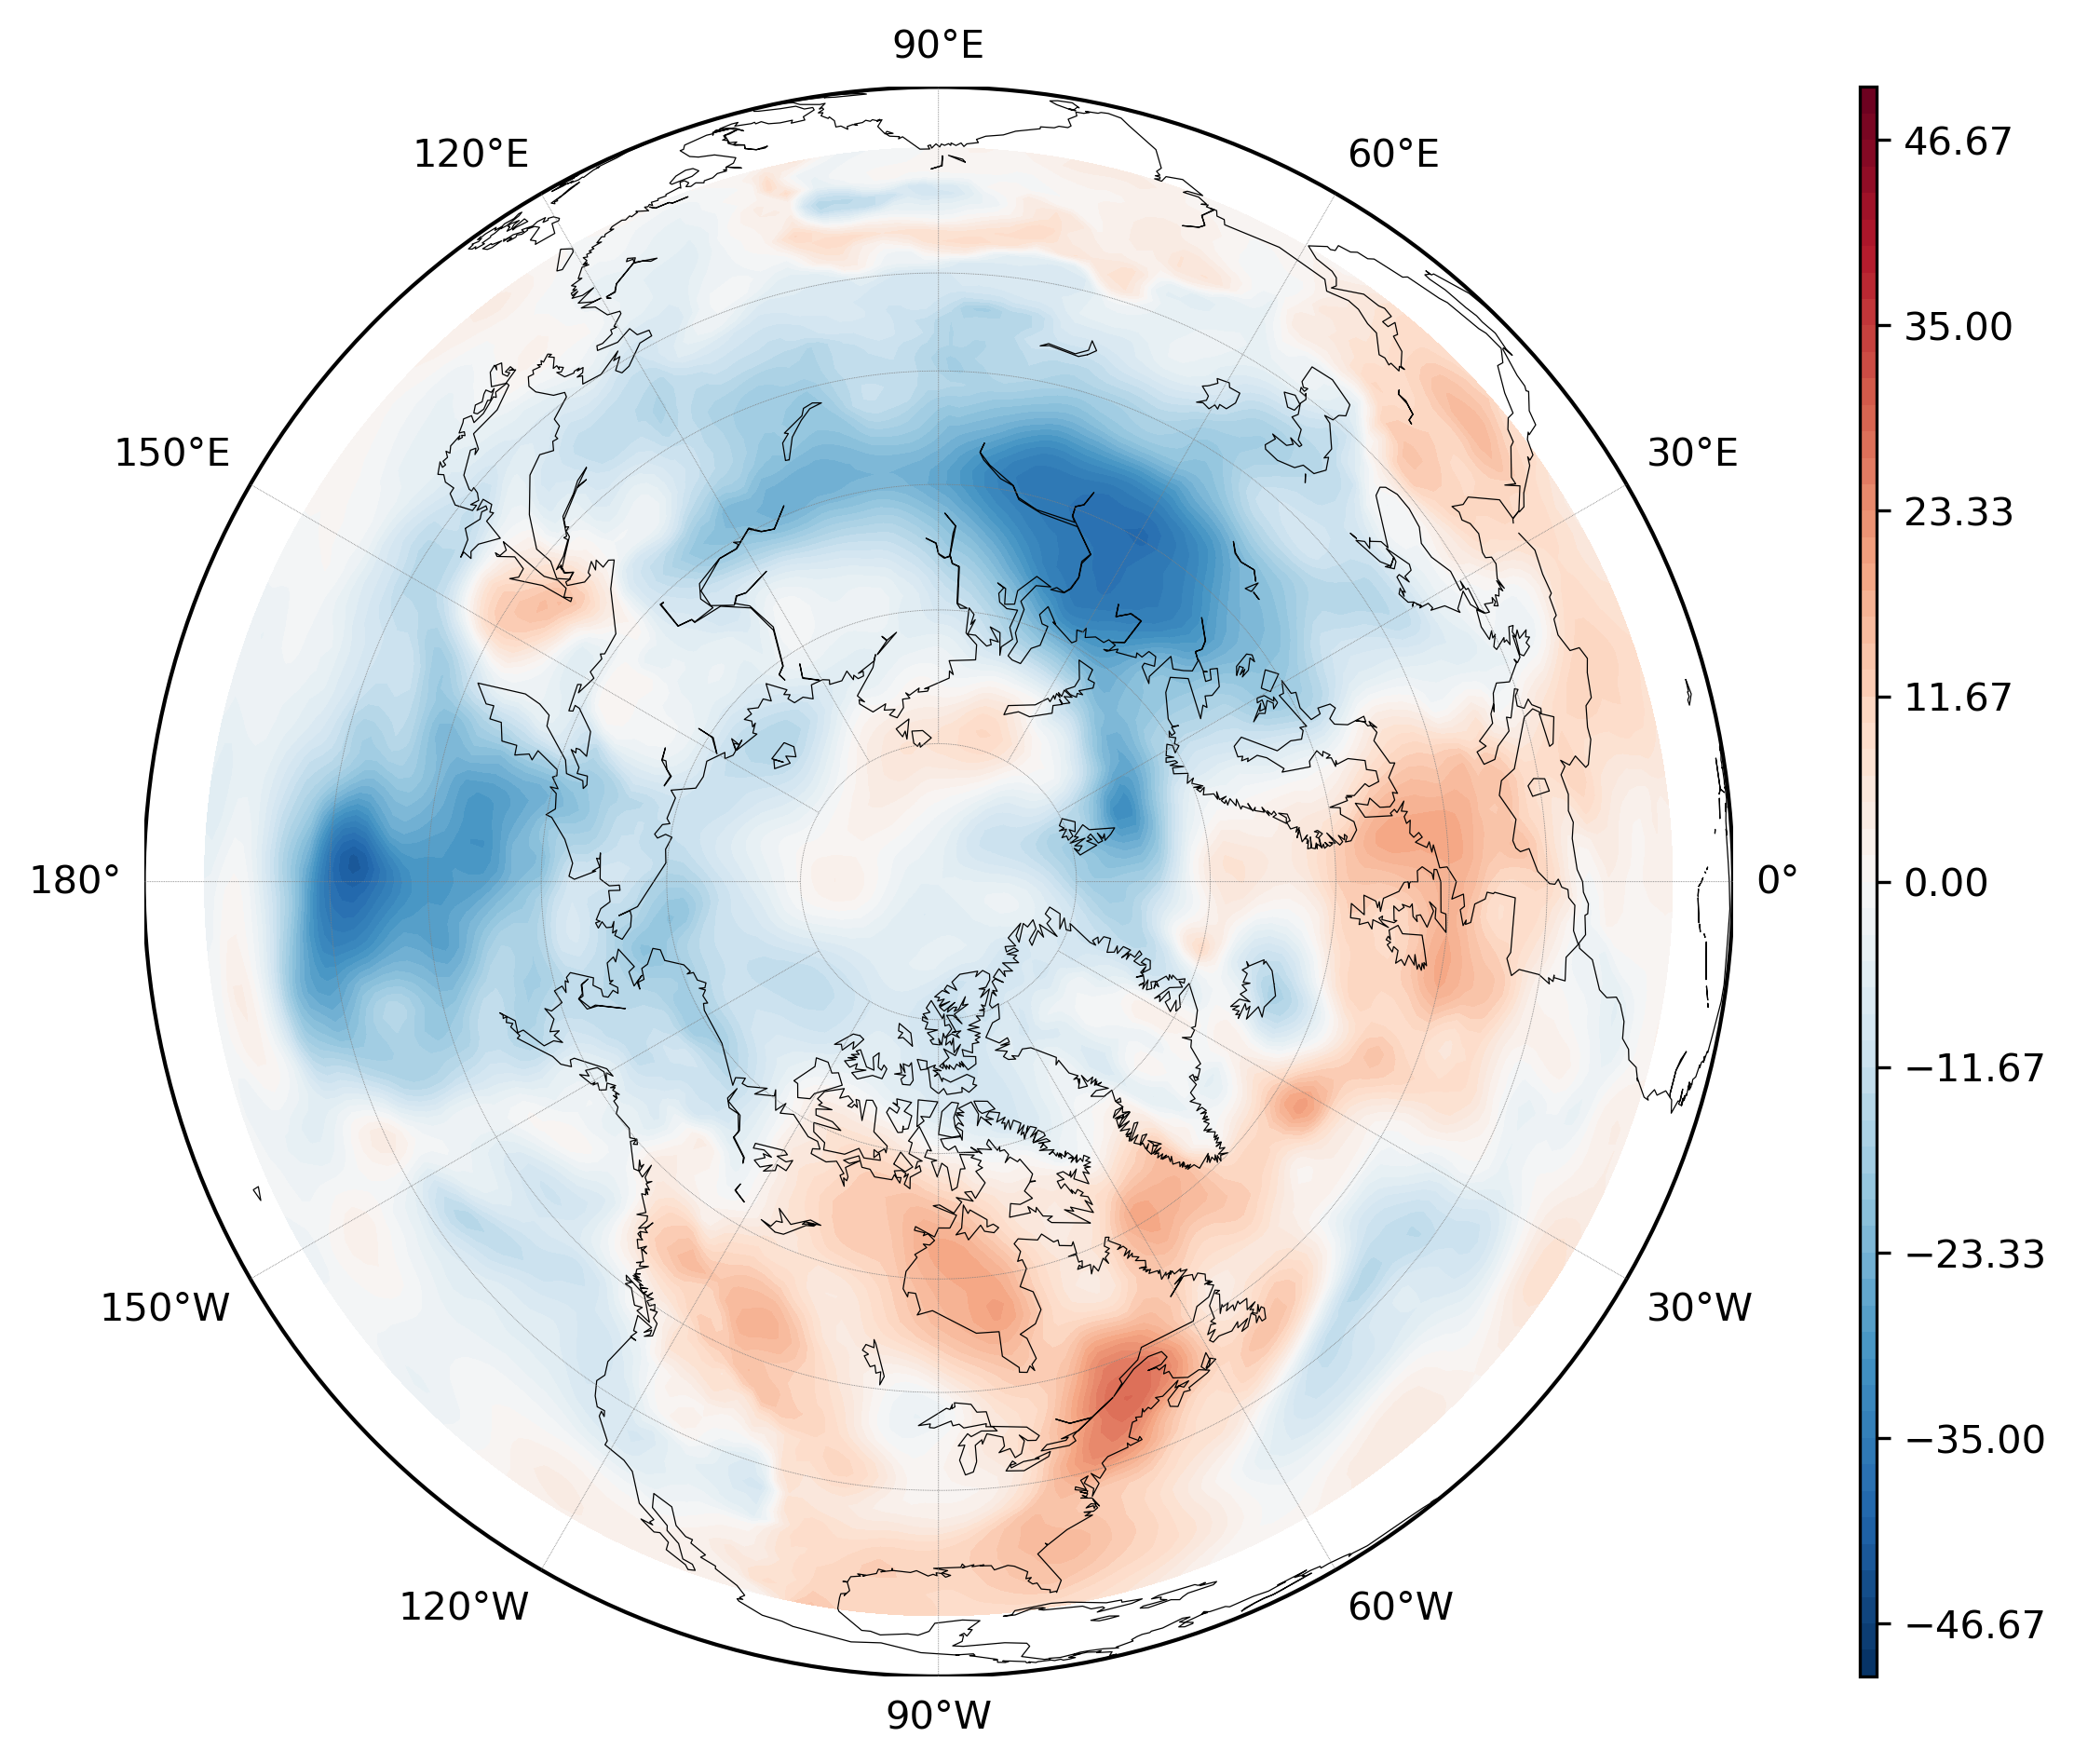

In [32]:
meridians=np.arange(0,360,30)
meridians_lbls=[1,1,1,1]
parallels=np.arange(40,80,10)
parallels_lbls=[1,1,0,0]

dif_hgt_ssw=bp_hgt_ssw_a[:,:]-bp_hgt_ssw_b[:,:]
dif_hgt_ssw_plot = np.concatenate([dif_hgt_ssw,dif_hgt_ssw[:,0][:,np.newaxis]], axis=-1)
lons_n=np.concatenate([lons,np.array([360.0])])

fig = plt.figure(figsize=(8,8),dpi=300)


ax1=fig.add_subplot(111,label="1")
#m=Basemap(projection='nplaea',lon_0=180,boundinglat=30,llcrnrlat = 30,urcrnrlat=80, llcrnrlon = 30,urcrnrlon=300,resolution='c')
#m1=Basemap(projection='cyl',ax=ax1, llcrnrlat = 30,urcrnrlat=80, llcrnrlon = -270,urcrnrlon=90,resolution='c')
m1=Basemap(projection='ortho',ax=ax1, lat_0 =90, lon_0 = 270, resolution='c')

x, y = m1(*np.meshgrid(lons_n, lats))
#x, y = m1(*np.meshgrid(lons, lats))
clevs = np.linspace(-50,50,61)
cs1=m1.contourf(x, y, dif_hgt_ssw_plot[:,:], clevs, cmap=plt.cm.RdBu_r)
m1.colorbar(cs1,location='right',size='1%',pad='8%')
#m.colorbar(cs,location='right',size='2%',pad='8%',ticks=[-5,-3,0,3,5])
m1.drawcoastlines(color="k",linewidth=0.3)
#m.drawcountries()DJF
#m.drawrivers()
#m.bluemarble()
m1.drawmeridians(meridians,color="grey",linewidth=0.2,labels=meridians_lbls)
m1.drawparallels(parallels,color="grey",linewidth=0.2,labels=parallels_lbls)
#ax1.set_xlabel('Longitude',labelpad=20,fontstretch= 'condensed')
#ax1.set_ylabel('Latitude',labelpad=40,fontstretch= 'condensed')
#ax1.set_xticks(meridians)
#ax1.set_title('$(STD_{<STV\ 30\ days\ after>} - STD_{<SSW\ 30\ days\ after>})*STD_{<DJF\ 59-year\ m